# Case X.
Lauri Marjanen, Team 10<br>
Neural Networks for Machine Learning Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

In [65]:
import copy
%pylab inline
import os
import tensorflow as tf
import numpy as np
import time
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("tensorflow", tf.__version__)

Populating the interactive namespace from numpy and matplotlib
tensorflow 2.7.0


C:\ProgramData\Anaconda3\envs\Anaconda ML\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Background

The aim of this Notebook is ...

# Data

In [66]:
batch_size = 128
img_height = 128
img_width = 128

curDir = os.getcwd()
train_dir = curDir + '/input/train'
test_dir = curDir + '/input/test'
val_dir = curDir + '/input/val'

# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (img_height, img_width),
  batch_size = batch_size)


# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (img_height, img_width),
  batch_size = batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size = (img_height, img_width),
  batch_size = batch_size)


Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.
Found 624 files belonging to 2 classes.


In [67]:
datagen = ImageDataGenerator(
  width_shift_range=0.01,
  height_shift_range=0.01,
  shear_range=0.01,
  zoom_range=0.01,
  horizontal_flip=True,
  fill_mode='nearest',
)
train_gen_ds = datagen.flow_from_directory(train_dir, target_size=(img_width,img_height), batch_size=batch_size,class_mode='binary')
val_gen_ds = datagen.flow_from_directory(val_dir, target_size=(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [68]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model and training

The following model was used ...

In [92]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16,3, padding='same', activation= 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3, padding='same', activation= 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3, padding='same', activation= 'relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate= 1e-4),
              metrics= ['accuracy'])

gen_model = keras.models.clone_model(model)
gen_model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate= 1e-4),
              metrics= ['accuracy'])

model.summary()
gen_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 64)      

# Results and Discussion

The following results were achieved ...

In [93]:
import time
EPOCHS = 10
VERBOSE = 1

t0 = time.time()

hist = model.fit(
  train_ds,
  validation_data= val_ds,
  verbose = VERBOSE,
  epochs = EPOCHS,
)

print("First model:",time.time() - t0)

Epoch 1/10
33/33 [==============================] - 26s 728ms/step - loss: 0.4988 - accuracy: 0.7664 - val_loss: 0.3323 - val_accuracy: 0.8025
Epoch 2/10
33/33 [==============================] - 23s 712ms/step - loss: 0.3054 - accuracy: 0.8778 - val_loss: 0.2270 - val_accuracy: 0.9300
Epoch 3/10
33/33 [==============================] - 23s 707ms/step - loss: 0.2284 - accuracy: 0.9166 - val_loss: 0.1639 - val_accuracy: 0.9473
Epoch 4/10
33/33 [==============================] - 23s 708ms/step - loss: 0.1761 - accuracy: 0.9367 - val_loss: 0.1572 - val_accuracy: 0.9348
Epoch 5/10
33/33 [==============================] - 23s 709ms/step - loss: 0.1502 - accuracy: 0.9458 - val_loss: 0.0997 - val_accuracy: 0.9616
Epoch 6/10
33/33 [==============================] - 24s 716ms/step - loss: 0.1269 - accuracy: 0.9545 - val_loss: 0.1041 - val_accuracy: 0.9559
Epoch 7/10
33/33 [==============================] - 24s 723ms/step - loss: 0.1217 - accuracy: 0.9552 - val_loss: 0.0795 - val_accuracy: 0.9703

In [94]:
t0 = time.time()

gen_hist = gen_model.fit( # first model fit with unaltered data
  train_ds,
  validation_data= val_ds,
  verbose = VERBOSE,
  epochs = round(EPOCHS/2),
)

gen_hist2 = gen_model.fit(
  train_gen_ds,
  validation_data= val_gen_ds,
  verbose = VERBOSE,
  epochs = round(EPOCHS/2),
)
print("Second model:",time.time() - t0)

Epoch 1/5
33/33 [==============================] - 26s 739ms/step - loss: 0.5072 - accuracy: 0.7637 - val_loss: 0.3777 - val_accuracy: 0.7852
Epoch 2/5
33/33 [==============================] - 24s 726ms/step - loss: 0.2976 - accuracy: 0.8843 - val_loss: 0.1983 - val_accuracy: 0.9338
Epoch 3/5
33/33 [==============================] - 24s 721ms/step - loss: 0.2055 - accuracy: 0.9260 - val_loss: 0.1388 - val_accuracy: 0.9463
Epoch 4/5
33/33 [==============================] - 24s 719ms/step - loss: 0.1689 - accuracy: 0.9408 - val_loss: 0.1041 - val_accuracy: 0.9645
Epoch 5/5
33/33 [==============================] - 24s 720ms/step - loss: 0.1392 - accuracy: 0.9473 - val_loss: 0.0888 - val_accuracy: 0.9655
Epoch 1/5
326/326 [==============================] - 142s 435ms/step - loss: 0.1408 - accuracy: 0.9452 - val_loss: 0.2297 - val_accuracy: 0.8750
Epoch 2/5
326/326 [==============================] - 143s 438ms/step - loss: 0.1092 - accuracy: 0.9569 - val_loss: 0.5298 - val_accuracy: 0.6875


# Conclusions

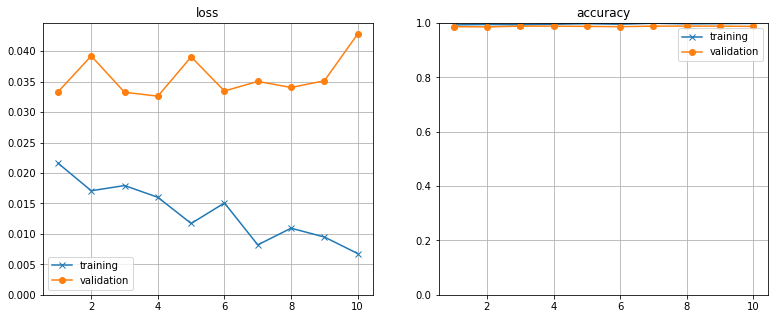

In [81]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import figure, subplot, plot, title, ylim, legend, grid

x_axis = np.arange(len(hist.history['loss'])) + 1


figure(figsize(13,5))
subplot(1,2,1)
plot(x_axis, hist.history['loss'], 'x-', label = 'training')
plot(x_axis, hist.history['val_loss'], 'o-', label = 'validation')
#plot(x_axis, gen_hist.history['loss'], 'x-', label = 'gen training')
#plot(x_axis, gen_hist.history['val_loss'], '+-', label = 'gen validation')
title('loss')
ylim(0,)
legend()
grid()


subplot(1,2,2)
plot(x_axis, hist.history['accuracy'], 'x-', label = 'training')
plot(x_axis, hist.history['val_accuracy'], 'o-', label = 'validation')
#plot(x_axis, gen_hist.history['accuracy'], '*-', label = 'gen training')
#plot(x_axis, gen_hist.history['val_accuracy'], '+-', label = 'gen validation')
title('accuracy')
ylim(0,1.0)
legend()
grid()

In [82]:
print("Train Loss = ", 100 * (hist.history['val_loss'][EPOCHS - 1]), "%")
print("Train Accuracy = ", 100 * (hist.history['val_accuracy'][EPOCHS -1]),"%")

print("Generated data Train Loss = ", 100 * (gen_hist.history['val_loss'][4]), "%")
print("Generated data Train Accuracy = ", 100 * (gen_hist.history['val_accuracy'][4]),"%")

Train Loss =  4.283145442605019 %
Train Accuracy =  98.75359535217285 %
Generated data Train Loss =  4.180019348859787 %
Generated data Train Accuracy =  98.46596121788025 %


In [95]:
results = model.evaluate(test_ds,verbose=VERBOSE)
print("Model 1 test acc:", 100 * results[1])

results = gen_model.evaluate(test_ds,verbose=VERBOSE)
print("Model 2 test acc:", 100 * results[1])

5/5 [==============================] - 2s 188ms/step - loss: 0.9852 - accuracy: 0.7147
Model 1 test acc: 71.47436141967773
5/5 [==============================] - 2s 174ms/step - loss: 0.8111 - accuracy: 0.7997
Model 2 test acc: 79.96794581413269
